In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data1.csv")
print(df.shape)
df

(4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df = df.rename(columns={'Residence_type': 'residence_type'})

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
print("Пол:")
print(df["gender"].unique())
print("Бывал ли в браке:")
print(df["ever_married"].unique())
print("Работа:")
print(df["work_type"].unique())
print("Тип проживания:")
print(df["residence_type"].unique())
print("Курил ли:")
print(df["smoking_status"].unique())

Пол:
['Male' 'Female']
Бывал ли в браке:
['Yes' 'No']
Работа:
['Private' 'Self-employed' 'Govt_job' 'children']
Тип проживания:
['Urban' 'Rural']
Курил ли:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


$\textbf{Посмотрим немного на графики распределения данных:}$

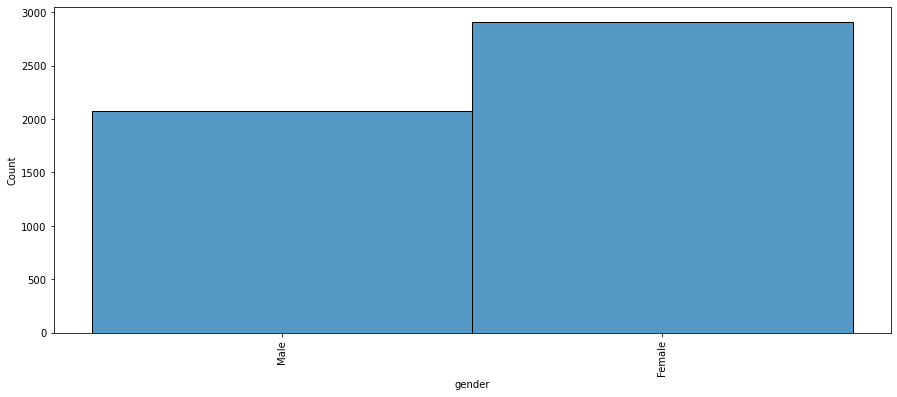

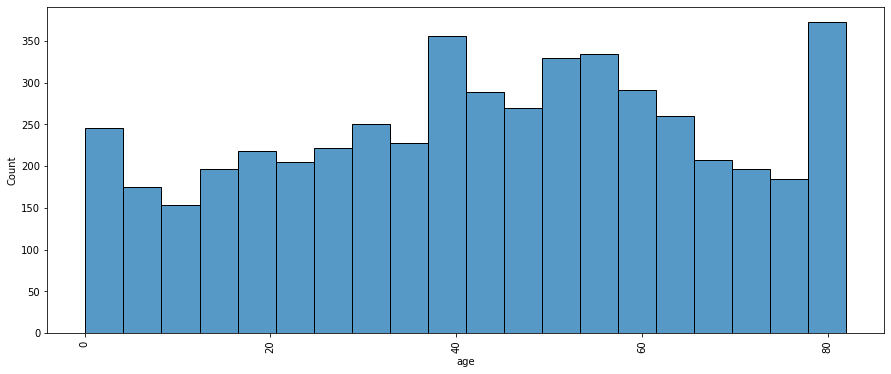

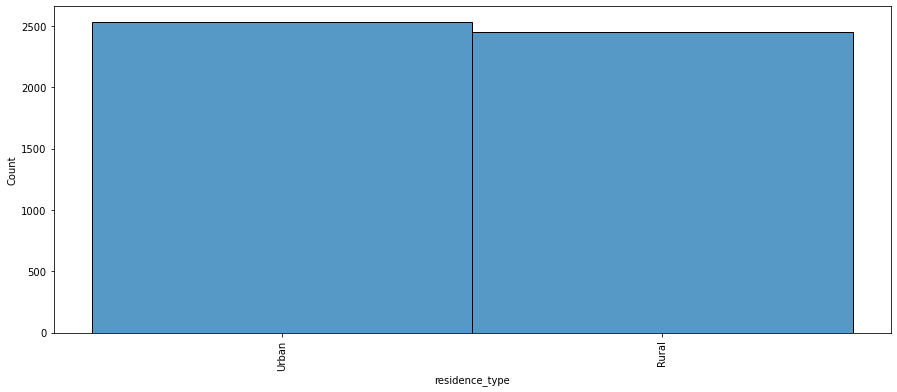

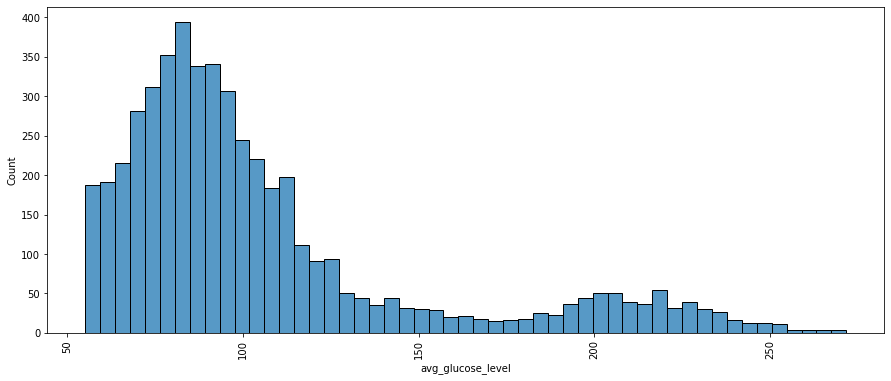

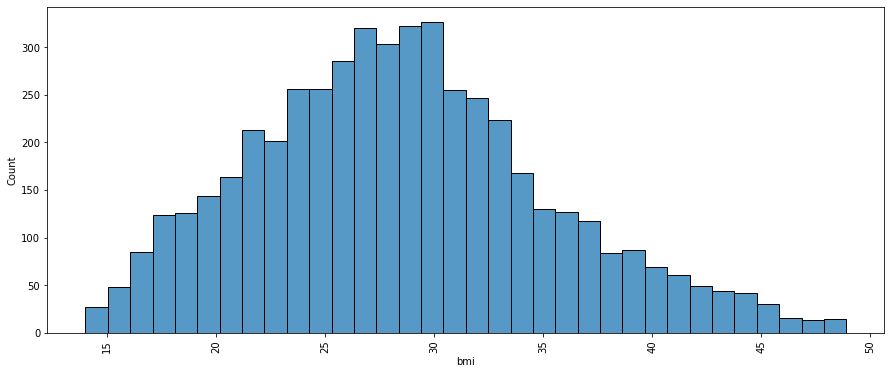

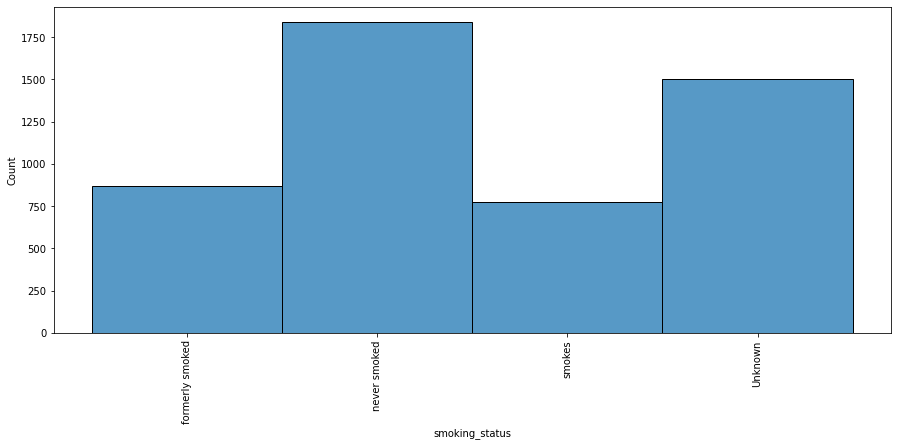

In [7]:
distribution_chart_columns = ['gender', 'age',
       'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
for i in distribution_chart_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

Теперь посмотрим на долю больных и здоровых людей по разным категориям:

In [8]:
df_age = df[["age", "stroke"]]
df_age = df_age.groupby('age').mean()

In [9]:
df_age.reset_index(inplace= True )

In [10]:
df_age

,age,stroke
0,0.08,0.000000
1,0.16,0.000000
2,0.24,0.000000
3,0.32,0.000000
4,0.40,0.000000
...,...,...
99,78.00,0.205882
100,79.00,0.202381
101,80.00,0.242857
102,81.00,0.233333


Посмотрим на вероятность/долю инсульта по разным возрастам:

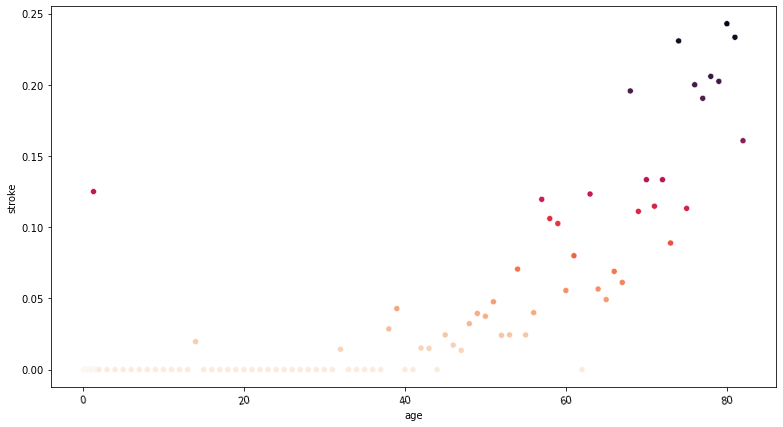

In [11]:
f, ax = plt.subplots(figsize=(13, 7))
sns.scatterplot(
    x="age",
    y="stroke",
    hue="stroke", palette=sns.color_palette("rocket_r", as_cmap=True),
    sizes=(1, 8),
    linewidth=0.5,
    data=df_age,
    ax=ax, legend=False
)
plt.xticks(rotation=9)
plt.show()

In [12]:
print(df[df["work_type"] == "Private"].shape)
print(df[df["smoking_status"] == "Unknown"].shape)

(2860, 11)
(1500, 11)


2800+ респондентов из 5000 не указали своё место работы. Кто-то из них мог вообще не работать, поэтому мы не будем учитывать данные данного столбца. 1500 людей не уточнили курили они или нет.

In [13]:
df = df.drop(['work_type'], axis=1)

In [14]:
print("Курят:", df[df["smoking_status"] == "smokes"].shape[0])
print("Раньше курили:", df[df["smoking_status"] == "formerly smoked"].shape[0])
print("Никогда не курили:", df[df["smoking_status"] == "never smoked"].shape[0])

Курят: 776
Раньше курили: 867
Никогда не курили: 1838


Тех кто курит, мы будем кодировать числом 1, бывших курильщиков -- 0.5, а тех кто никогда не курил числом 0. Для воздержавшихся от ответа мы вставим среднее взвешенное значение: $\frac{776 \cdot 1 + 867 \cdot 0.5 + 1838 \cdot 0}{776+867+1838} \approx 0.347$

$\textbf{Нормализация продолжается:}$

In [15]:
df.loc[df["smoking_status"] == "smokes", "smoking_status"] = 1
df.loc[df["smoking_status"] == "formerly smoked", "smoking_status"] = 0.5
df.loc[df["smoking_status"] == "never smoked", "smoking_status"] = 0
df.loc[df["smoking_status"] == "Unknown", "smoking_status"] = 0.347

df.loc[df["gender"] == "Male", "gender"] = 1
df.loc[df["gender"] == "Female", "gender"] = 0

df.loc[df["ever_married"] == "Yes", "ever_married"] = 1
df.loc[df["ever_married"] == "No", "ever_married"] = 0

df.loc[df["residence_type"] == "Urban", "residence_type"] = 1 
df.loc[df["residence_type"] == "Rural", "residence_type"] = 0
df = df.rename(columns={'residence_type': 'urban_dweller'})


In [16]:
df["age"] = df["age"] / 100
df["avg_glucose_level"] = df["avg_glucose_level"] / 280
df["bmi"] = df["bmi"] / 50

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,urban_dweller,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.67,0,1,1,1,0.816750,0.732,0.5,1
1,1,0.80,0,1,1,0,0.378286,0.650,0,1
2,0,0.49,0,0,1,1,0.611536,0.688,1,1
3,0,0.79,1,0,1,0,0.621857,0.480,0,1
4,1,0.81,0,0,1,1,0.665036,0.580,0.5,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,0.41,0,0,0,0,0.250536,0.596,0.5,0
4977,1,0.40,0,0,1,1,0.682679,0.622,1,0
4978,0,0.45,1,0,1,0,0.339357,0.636,1,0
4979,1,0.40,0,0,1,0,0.299786,0.600,1,0


$\textbf{Распределение на test data и train data}$

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [20]:
x["gender"] = x["gender"].astype(int)
x["smoking_status"] = x["smoking_status"].astype(int)
x["urban_dweller"] = x["urban_dweller"].astype(int)
x["ever_married"] = x["ever_married"].astype(int)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=3
)

$\textbf{Обучение}$

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


logistic_model = LogisticRegression()
linear_model = LinearRegression()
gb_model = GradientBoostingClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC()

logistic_model.fit(x_train, y_train)
linear_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
nb_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

logistic_pred = logistic_model.predict(x_test)
linear_pred = linear_model.predict(x_test)
gb_pred = gb_model.predict(x_test)
nb_pred = nb_model.predict(x_test)
knn_pred = knn_model.predict(x_test)
svm_pred = svm_model.predict(x_test)

logistic_acc = accuracy_score(y_test, logistic_pred)
linear_acc = accuracy_score(y_test, linear_pred.round())
gb_acc = accuracy_score(y_test, gb_pred)
nb_acc = accuracy_score(y_test, nb_pred)
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)

Корректность:

In [23]:
print("Logistic Regression:", logistic_acc)
print("Linear Regression:  ", linear_acc)
print("Gradient Boosting:  ", gb_acc)
print("Naive Bayes:        ", nb_acc)
print("KNN:                ", knn_acc)
print("SVM:                ", svm_acc)

Logistic Regression: 0.9568706118355065
Linear Regression:   0.9568706118355065
Gradient Boosting:   0.9558676028084253
Naive Bayes:         0.8595787362086259
KNN:                 0.9538615847542627
SVM:                 0.9568706118355065


In [24]:
import pickle
with open("linear_model", "wb") as file:
    pickle.dump(linear_model, file)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from random import randrange
max_acc = 0
for i in range(100):
    n_estimators = randrange(50, 500, 50)
    max_depth = randrange(5, 40, 5)
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train, y_train)
    rf_pred = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    if max_acc <= rf_accuracy:
        print("Random Forest:", rf_accuracy)
        max_acc = rf_accuracy
        rf_model_name = "rf_model.pkl"
        with open(rf_model_name, "wb") as file:
            pickle.dump(rf_model, file)
        break

Random Forest: 0.954864593781344


Для нас будет удобнее использовать Linear Regression Model, потому что она позволяет получить вероятностный ответ.

In [26]:
# gender, age, hypertension, heart_disease, ever_married, urban_dweller, avg_glucose_level, bmi, smoking_status
def predict_stroke(model, input_data):
    data_array = input_data
    if len(data_array) != 9:
        return -10  # Недостаточно данных
    for i in data_array:
        if type(i) not in [int, float, bool]:
            return -11  # Обнаружено не числовое поле
    for i in [0, 2, 3, 4, 5]:
        if data_array[i] not in [0, 1]:
            return -(i + 1)  # Ошибка в поле №n (нумерация с единицы)
    if data_array[8] not in [0, 0.347, 0.5, 1]:
        return -9  # Ошибка в поле №9 (нумерация с единицы)
    if not (0 <= data_array[1] <= 123):
        return -2  # Нереалистичный возраст
    if not (10 <= data_array[6] <= 400):
        return -7  # Нереалистичный уровень глюкозы
    if not (3 <= data_array[7] <= 260):
        return -8  # Нереалистичный индекс массы тела

    data_array[1] /= 100
    data_array[6] /= 280
    data_array[7] /= 50
    arr = np.array([data_array, [0, 0, 0, 0, 0, 0, 0, 0, 0]])
    return model.predict(arr)[0]